In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import plotly.io as pio
pio.renderers.default = 'chrome'

In [2]:
df = pd.read_csv('mask_pop.csv', index_col=0)
df.head()

,state_name,total_pop,confirmed_cases,deaths,never,rarely,sometimes,frequently,always,deaths_per_case,infection_rate,death_per_population
0,Alabama,4887871.0,26232,409,0.08,0.08,0.15,0.22,0.48,0.0156,0.0054,0.000084
1,Alaska,737438.0,10632,55,0.05,0.07,0.09,0.32,0.47,0.0052,0.0144,0.000075
2,Arizona,7171646.0,169309,3734,0.05,0.05,0.09,0.15,0.66,0.0221,0.0236,0.000521
3,Arkansas,3013825.0,13475,230,0.09,0.09,0.14,0.22,0.46,0.0171,0.0045,0.000076
4,California,39557045.0,325951,7200,0.03,0.03,0.06,0.16,0.72,0.0221,0.0082,0.000182


## Different Masks Use Status for Per County In NY State

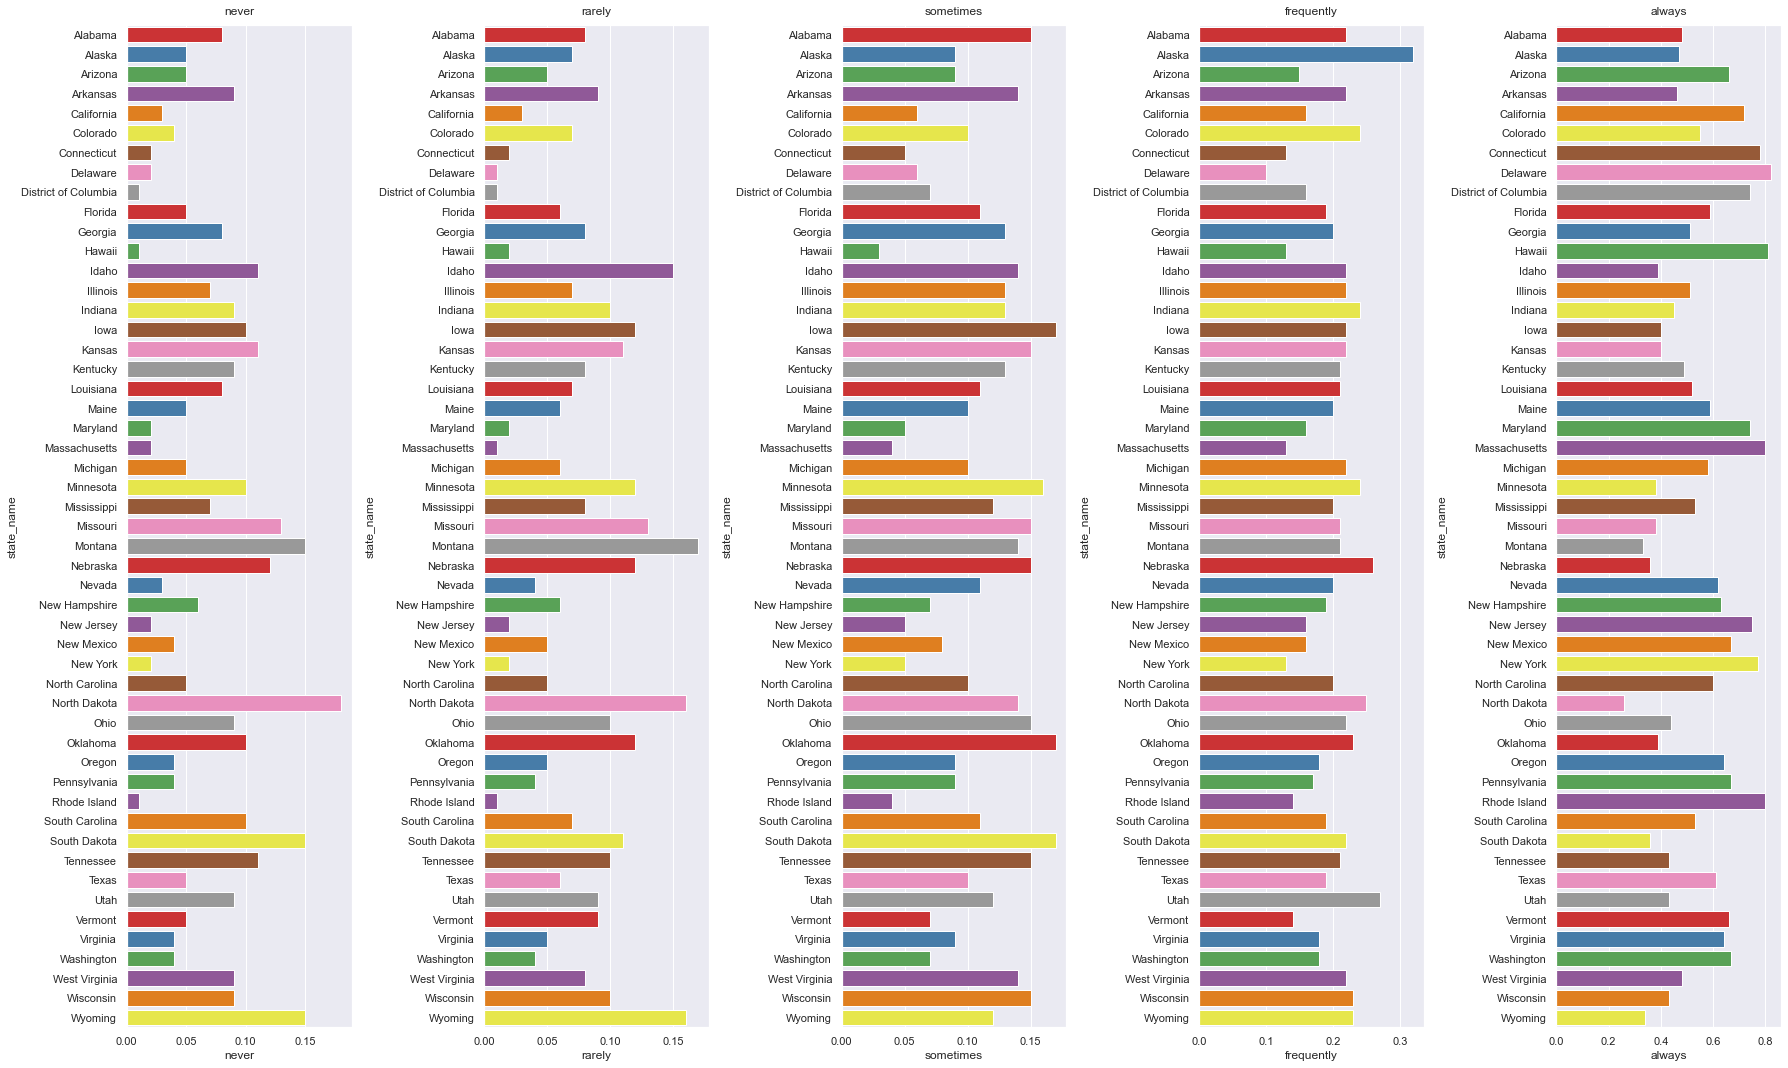

In [3]:
fig, ax = plt.subplots(figsize=(25, 15))

plt.subplot(1, 5, 1)
sns.barplot(x='never', y='state_name', data=df, palette='Set1')
plt.title('never', fontsize=12, pad=10)

plt.subplot(1, 5, 2)
sns.barplot(x='rarely', y='state_name', data=df, palette='Set1')
plt.title('rarely', fontsize=12, pad=10)

plt.subplot(1, 5, 3)
sns.barplot(x='sometimes', y='state_name', data=df, palette='Set1')
plt.title('sometimes', fontsize=12, pad=10)

plt.subplot(1, 5, 4)
sns.barplot(x='frequently', y='state_name', data=df, palette='Set1')
plt.title('frequently', fontsize=12, pad=10)

plt.subplot(1, 5, 5)
sns.barplot(x='always', y='state_name', data=df, palette='Set1')
plt.title('always', fontsize=12, pad=10)
plt.tight_layout();

In [4]:
df[df['never']==df['never'].max()][['state_name','never']]

,state_name,never
34,North Dakota,0.18


In [5]:
df[df['never']==df['never'].min()][['state_name','never']]

,state_name,never
8,District of Columbia,0.01
11,Hawaii,0.01
39,Rhode Island,0.01


In [6]:
df[df['rarely'] == df['rarely'].max()][['state_name','rarely']]

,state_name,rarely
26,Montana,0.17


In [7]:
df[df['rarely'] == df['rarely'].min()][['state_name','rarely']]

,state_name,rarely
7,Delaware,0.01
8,District of Columbia,0.01
21,Massachusetts,0.01
39,Rhode Island,0.01


In [8]:
df[df['sometimes'] == df['sometimes'].max()][['state_name','sometimes']]

,state_name,sometimes
15,Iowa,0.17
36,Oklahoma,0.17
41,South Dakota,0.17


In [9]:
df[df['sometimes'] == df['sometimes'].min()][['state_name','sometimes']]

,state_name,sometimes
11,Hawaii,0.03


In [10]:
df[df['frequently'] == df['frequently'].max()][['state_name','frequently']]

,state_name,frequently
1,Alaska,0.32


In [11]:
df[df['sometimes'] == df['sometimes'].min()][['state_name','frequently']]

,state_name,frequently
11,Hawaii,0.13


In [12]:
df[df['always'] == df['always'].max()][['state_name','always']]

,state_name,always
7,Delaware,0.82


In [13]:
df[df['always'] == df['always'].min()][['state_name','always']]

,state_name,always
34,North Dakota,0.26


In [14]:
df[df['total_pop']==df['total_pop'].max()]

,state_name,total_pop,confirmed_cases,deaths,never,rarely,sometimes,frequently,always,deaths_per_case,infection_rate,death_per_population
4,California,39557045.0,325951,7200,0.03,0.03,0.06,0.16,0.72,0.0221,0.0082,0.000182


In [15]:
code = ['AL','AK','AZ','AR','CA','CO','CT','DC','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA',
        'ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR',
        'PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']

df['code'] = code
df.head()

,state_name,total_pop,confirmed_cases,deaths,never,rarely,sometimes,frequently,always,deaths_per_case,infection_rate,death_per_population,code
0,Alabama,4887871.0,26232,409,0.08,0.08,0.15,0.22,0.48,0.0156,0.0054,0.000084,AL
1,Alaska,737438.0,10632,55,0.05,0.07,0.09,0.32,0.47,0.0052,0.0144,0.000075,AK
2,Arizona,7171646.0,169309,3734,0.05,0.05,0.09,0.15,0.66,0.0221,0.0236,0.000521,AZ
3,Arkansas,3013825.0,13475,230,0.09,0.09,0.14,0.22,0.46,0.0171,0.0045,0.000076,AR
4,California,39557045.0,325951,7200,0.03,0.03,0.06,0.16,0.72,0.0221,0.0082,0.000182,CA


In [16]:
# text content should be str format for display

for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['state_name'] + '<br>' + \
    'Population: ' + df['total_pop'] + '<br>' + \
    'Confirmed Cases: ' + df['confirmed_cases'] + '<br>' + \
    'Deaths: ' + df['deaths'] + '<br>' + \
    'Mask_never: ' + df['never'] + '<br>' + \
    'Mask_rarely: ' + df['rarely'] + '<br>' + \
    'Mask_sometimes: ' + df['sometimes'] + '<br>' + \
    'Mask_frequently: ' + df['frequently'] + '<br>' + \
    'Mask_always: ' + df['always'] + '<br>' + \
    'Deaths Per Case: ' + df['deaths_per_case'] + '<br>' + \
    'Infection Rate: ' + df['infection_rate'] + '<br>' + \
    'Deaths Per Population: ' + df['death_per_population']

In [17]:
fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = df['confirmed_cases'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    text=df['text'],
    marker_line_color='white',
    colorscale = 'portland',
    colorbar_title = 'Color Scale (confirmed_cases)'
))

fig.update_layout(
    title_text = '2020 US COVID-19 Status by State',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(173,216,230)'),
)

fig.show()